Found 10217 images belonging to 6 classes.
Found 2916 images belonging to 6 classes.
Iteration 1/1
Training Agent 1/1 with Learning Rate: 0.008577, Batch Size: 31
Epoch 1/20


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


320/320 ━━━━━━━━━━━━━━━━━━━━ 105s 317ms/step - accuracy: 0.5151 - loss: 1.3157 - val_accuracy: 0.8920 - val_loss: 0.4605
Epoch 2/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 97s 302ms/step - accuracy: 0.8852 - loss: 0.3921 - val_accuracy: 0.9084 - val_loss: 0.3310
Epoch 3/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 147s 317ms/step - accuracy: 0.9043 - loss: 0.3056 - val_accuracy: 0.8964 - val_loss: 0.3291
Epoch 4/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 90s 281ms/step - accuracy: 0.9263 - loss: 0.2347 - val_accuracy: 0.9390 - val_loss: 0.2015
Epoch 5/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 91s 284ms/step - accuracy: 0.9396 - loss: 0.1887 - val_accuracy: 0.9482 - val_loss: 0.1748
Epoch 6/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 85s 264ms/step - accuracy: 0.9527 - loss: 0.1554 - val_accuracy: 0.9588 - val_loss: 0.1356
Epoch 7/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 95s 296ms/step - accuracy: 0.9507 - loss: 0.1592 - val_accuracy: 0.9348 - val_loss: 0.2042
Epoch 8/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 99s 309ms/step - accuracy: 0.9593 - loss: 0.1353 - v

Best Hyperparameters: Learning Rate: 0.008576856061436728, Batch Size: 31
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 259ms/step - accuracy: 0.9777 - loss: 0.0940
Validation Loss: 0.0823
Validation Accuracy: 0.9801


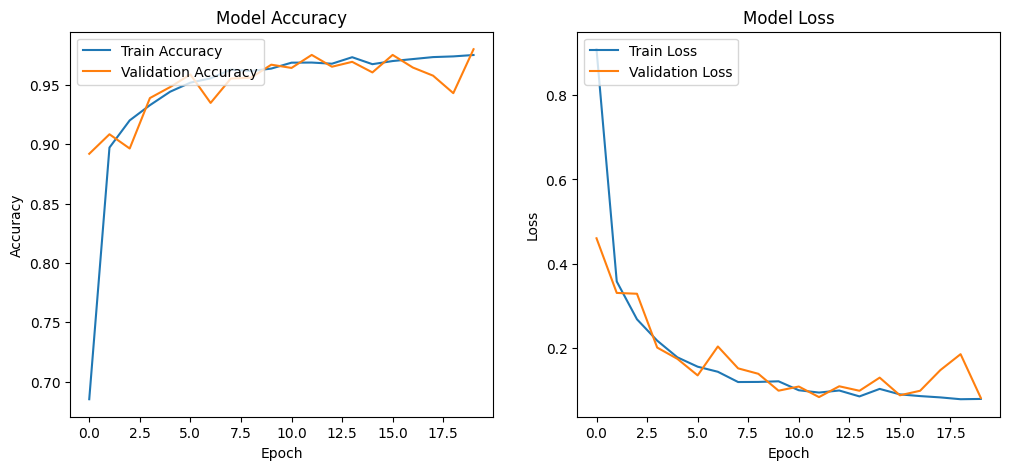

92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 286ms/step


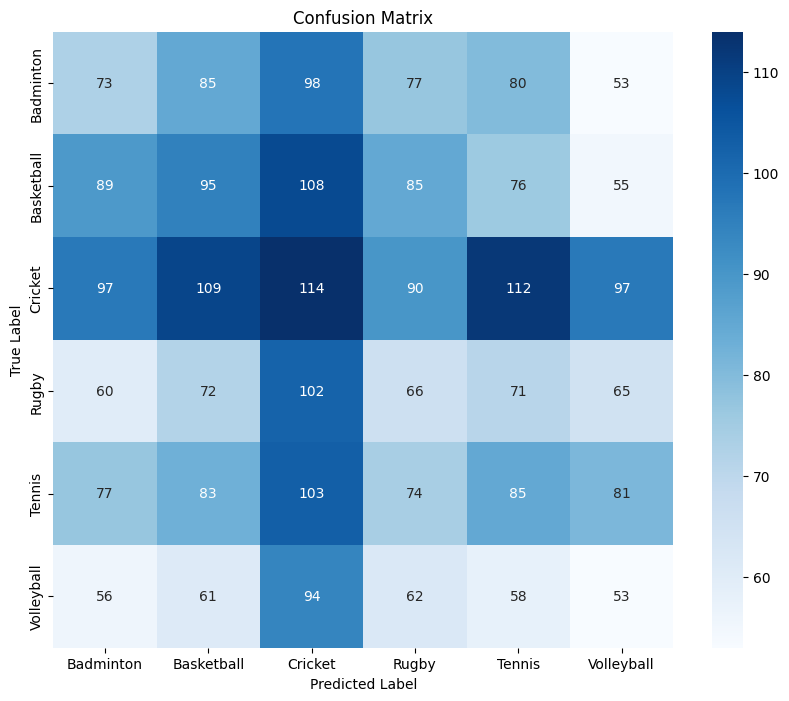

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Step 1: Set up the data generators
base_dir = 'dataset_split'  # Directory with train and validation folders

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(224, 224),  # MobileNetV3 input size
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'validation'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Function to build the model_
def build_model():
    base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(len(train_generator.class_indices), activation='softmax')(x)  # Adjust for number of classes
    model = Model(inputs=base_model.input, outputs=x)
    return model

# Step 2: Define the Battle Royale Optimization function
def battle_royale_optimization(num_agents, num_iterations, train_generator, validation_generator):
    agents = np.random.rand(num_agents, 2)  # Each agent has [learning_rate, batch_size]
    best_score = float('inf')
    best_agent = None
    best_model = None
    best_history = None

    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")  # Print iteration number
        for i in range(num_agents):
            learning_rate = agents[i][0] * 0.01  # Scale to suitable learning rate range
            batch_size = int(agents[i][1] * 64) + 16  # Scale to suitable batch size range (16 to 80)
            # Create and compile model
            model = build_model()
            model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])_
            # Train the model
            print(f"Training Agent {i + 1}/{num_agents} with Learning Rate: {learning_rate:.6f}, Batch Size: {batch_size}")
           
            history = model.fit(
                train_generator,
                epochs=20,  
                batch_size=batch_size,
                validation_data=validation_generator
            )
            # Evaluate model performance (use validation loss as the score)
            score = model.evaluate(validation_generator)[0]
            # Update the best score and agent
            if score < best_score:
                best_score = score
                best_agent = agents[i]
                best_model = model  # Keep reference to the best model
                best_history = history  # Capture the best training history

        # Update agents for the next iteration (simplified)
        agents = np.clip(agents + np.random.normal(0, 0.05, agents.shape), 0, 1)  # Simple update

    # Save the final best model
    best_model.save('/teamspace/studios/this_studio/testbest.h5')
    best_model.save('/teamspace/studios/this_studio/testbest.keras')
    return best_agent, best_model, best_history  # Return the best model and its history

# Example usage of the BRO optimization
best_hyperparams, best_model, best_history = battle_royale_optimization(num_agents=1, num_iterations=1, train_generator=train_generator, validation_generator=validation_generator)
print(f'Best Hyperparameters: Learning Rate: {best_hyperparams[0]*0.01}, Batch Size: {int(best_hyperparams[1]*64) + 16}')

# Step 3: Evaluate the best model
loss, accuracy = best_model.evaluate(validation_generator)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# Step 4: Plot accuracy and loss graphs
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    plt.show()

# Plot training history
plot_training_history(best_history)

# Plot confusion matrix
def plot_confusion_matrix(model, validation_generator):
    y_true = validation_generator.classes
    y_pred = model.predict(validation_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(validation_generator.class_indices.keys()), yticklabels=list(validation_generator.class_indices.keys()))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Call to plot confusion matrix
plot_confusion_matrix(best_model, validation_generator)

# Save the final trained model
best_model.save('/teamspace/studios/this_studio/test1.h5')
best_model.save('/teamspace/studios/this_studio/test1.keras')


In [ ]:
# Code to predict the ouput

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
# Manually define class indices (Example: adjust according to your actual class labels)
class_indices = {0: 'Badminton', 1: 'Basketball', 2: 'Cricket', 3: 'Rugby', 4: 'Volleyball', 5: 'Tennis'}





# Step 1: Load the model
model_path = '/teamspace/studios/this_studio/test1.keras'  # Replace with the actual path to your model
model = tf.keras.models.load_model(model_path)
# Step 2: Prepare a function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input size
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale pixel values
    return img_array
# Step 3: Make predictions
def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class[0], predictions[0]
# Step 4: Example usage
image_path = 'examples/cricket.jpeg'  # Replace with the path to your image
predicted_class, prediction_probs = predict_image(model, image_path)

# Display results
predicted_label = class_indices[predicted_class]
print(f'Predicted Class: {predicted_label}')
print(f'Prediction Probabilities: {prediction_probs}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
Predicted Class: Cricket
Prediction Probabilities: [2.3112866e-06 3.1205265e-02 7.3090971e-01 7.8399710e-02 1.5868042e-01
 8.0260861e-04]


In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Load the model
model_path = '/teamspace/studios/this_studio/test1.keras'  # Adjust to your model path
model = load_model(model_path)

# Set up the data generator for validation data
base_dir = 'dataset_split'  # Adjust this to your dataset path
val_datagen = ImageDataGenerator(rescale=1./255)

# Create a validation data generator
validation_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'validation'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for accurate evaluation
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)

# Print the results
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')


Found 2916 images belonging to 6 classes.


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 270ms/step - accuracy: 0.9803 - loss: 0.0869
Validation Loss: 0.0823
Validation Accuracy: 0.9801


Found 1158 files belonging to 6 classes.


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 280ms/step


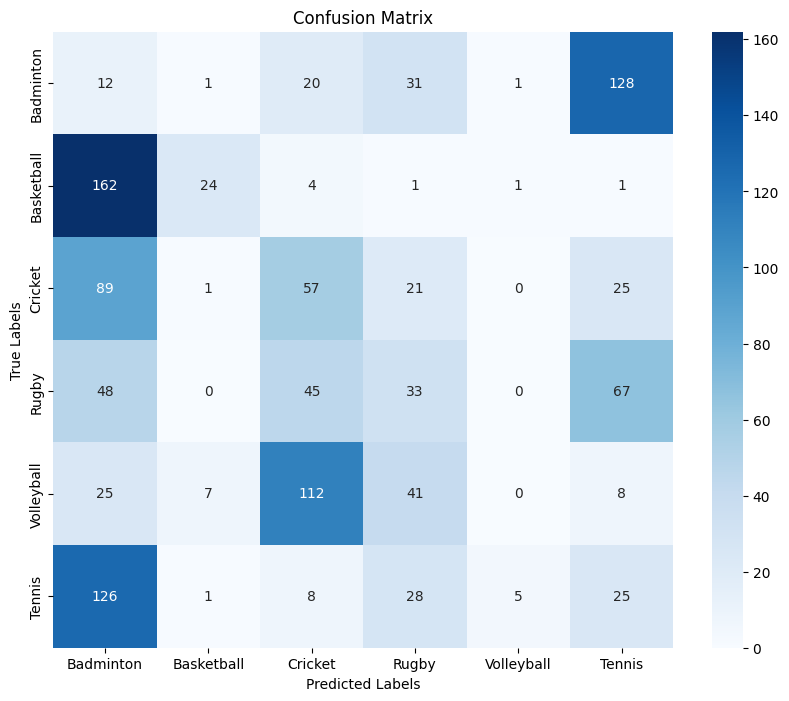

              precision    recall  f1-score   support

   Badminton       0.03      0.06      0.04       193
  Basketball       0.71      0.12      0.21       193
     Cricket       0.23      0.30      0.26       193
       Rugby       0.21      0.17      0.19       193
  Volleyball       0.00      0.00      0.00       193
      Tennis       0.10      0.13      0.11       193

    accuracy                           0.13      1158
   macro avg       0.21      0.13      0.13      1158
weighted avg       0.21      0.13      0.13      1158



In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Manually define class indices
class_indices = {0: 'Badminton', 1: 'Basketball', 2: 'Cricket', 3: 'Rugby', 4: 'Volleyball', 5: 'Tennis'}
class_names = list(class_indices.values())  # Extract class names for the confusion matrix plot

# Step 1: Load the model
model_path = '/teamspace/studios/this_studio/test1.keras'  # Replace with your model path
model = tf.keras.models.load_model(model_path)

# Step 2: Load the test dataset (assuming it's structured with subfolders for each class)
test_dir = 'newdataset/test'  # Replace with the path to your test dataset directory
batch_size = 32
img_size = (224, 224)  # Should match the input size expected by the model

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='int',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=False  # Important to avoid shuffling for evaluation
)

# Get the true labels
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Step 3: Make predictions on the test set
predictions = model.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)

# Step 4: Generate and plot the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Optional: Display a classification report (precision, recall, F1-score)
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_classes, target_names=class_names))


Found 1158 files belonging to 6 classes.


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2024-10-30 11:38:34.595561: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 319ms/step


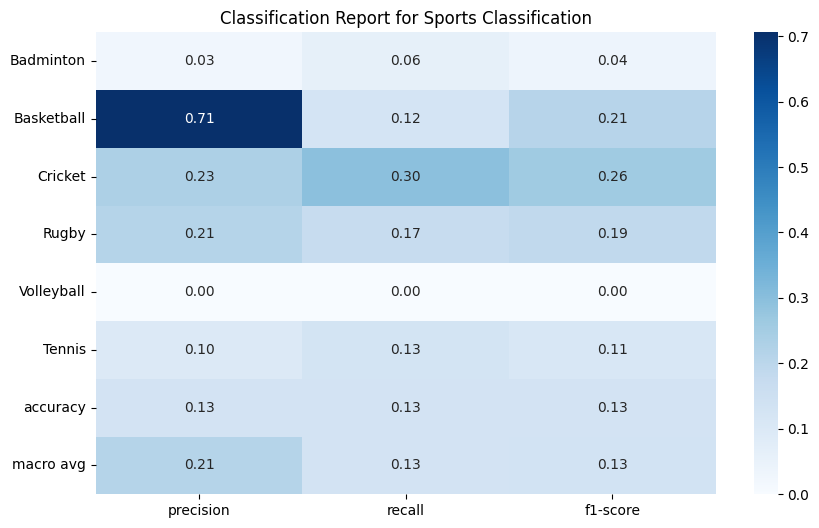

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define class labels
class_labels = ['Badminton', 'Basketball', 'Cricket', 'Rugby', 'Volleyball', 'Tennis']

# Step 1: Load the model
model_path = 'test1.keras'  # Replace with your actual model path
model = tf.keras.models.load_model(model_path)

# Step 2: Load the test dataset
test_dir = 'newdataset/test'  # Replace with the path to your test dataset directory
batch_size = 32
img_size = (224, 224)  # Ensure this matches the input size expected by your model

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='int',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=False
)

# Get true labels
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Step 3: Make predictions on the test set
predictions = model.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)

# Step 4: Generate classification report
report = classification_report(true_labels, predicted_classes, target_names=class_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Step 5: Plot classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report for Sports Classification")
plt.show()
